In [ ]:
# DGMD-14 Final Project 
# Determining Ballet Moves using Machine Learning
# GROUP NAME: The Eastenders
# NAMES: Ana Nystedt, Allyson Bieryla, Devesh Bhor

In [2]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Import CSV data
df = pd.read_csv('single-jump.csv') 
print(df)

                        Date  HostTimestamp         NodeName  NodeTimestamp  \
0    22/07/2020 10:57:40.531         680415  AM1V310 @394D30          87056   
1    22/07/2020 10:57:40.531         680415  AM1V310 @394D30          87056   
2    22/07/2020 10:57:40.531         680416  AM1V310 @394D30          87056   
3    22/07/2020 10:57:40.579         680453  AM1V310 @394D30          87060   
4    22/07/2020 10:57:40.579         680453  AM1V310 @394D30          87060   
..                       ...            ...              ...            ...   
457  22/07/2020 10:57:45.080         684955  AM1V310 @394D30          87626   
458  22/07/2020 10:57:45.080         684955  AM1V310 @394D30          87626   
459  22/07/2020 10:57:45.109         684983  AM1V310 @394D30          87630   
460  22/07/2020 10:57:45.109         684983  AM1V310 @394D30          87630   
461  22/07/2020 10:57:45.109         684983  AM1V310 @394D30          87630   

          RawData      qi      qj      qk        qs

In [13]:
# select certain columns
print(df.qi)

0      0.0009
1      0.0018
2      0.0014
3      0.0029
4      0.0022
        ...  
457    0.0530
458    0.0537
459    0.0516
460    0.0526
461    0.0521
Name: qi, Length: 462, dtype: float64


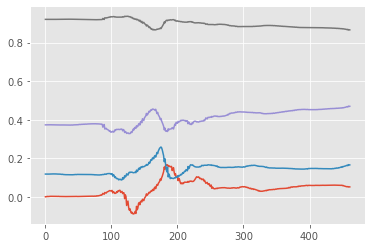

In [18]:
# try plot
from matplotlib import style
style.use("ggplot")

plt.plot(df.qi)
plt.plot(df.qj)
plt.plot(df.qk)
plt.plot(df.qs)
